In [ ]:
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

In [13]:
img_path = "samples/Background_Subtraction_Tutorial_frame.png"
img = cv.imread(
    os.path.join(os.getcwd(),img_path)
)
if img is not None:
    assert AttributeError("img_path could not be open")
img.shape

(576, 768, 3)

In [19]:
print(f"Image shape: \nH={img.shape[0]} \nW = {img.shape[1]} \nC={img.shape[2]}")
print("Dtype:",img.dtype)

Image shape: 
H=576 
W = 768 
C=3
Dtype: uint8


This is because matplotlib expects the image in RGB format whereas OpenCV stores images in BGR format. Thus, for correct display, we need to reverse the channels of the image.

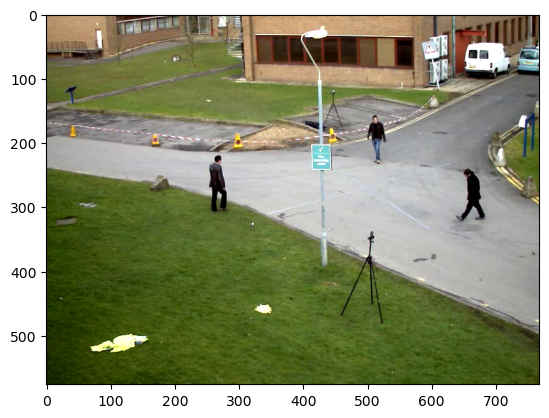

In [29]:
plt.imshow(img[:,:,::-1])

Text(0.5, 1.0, 'Merged Output')

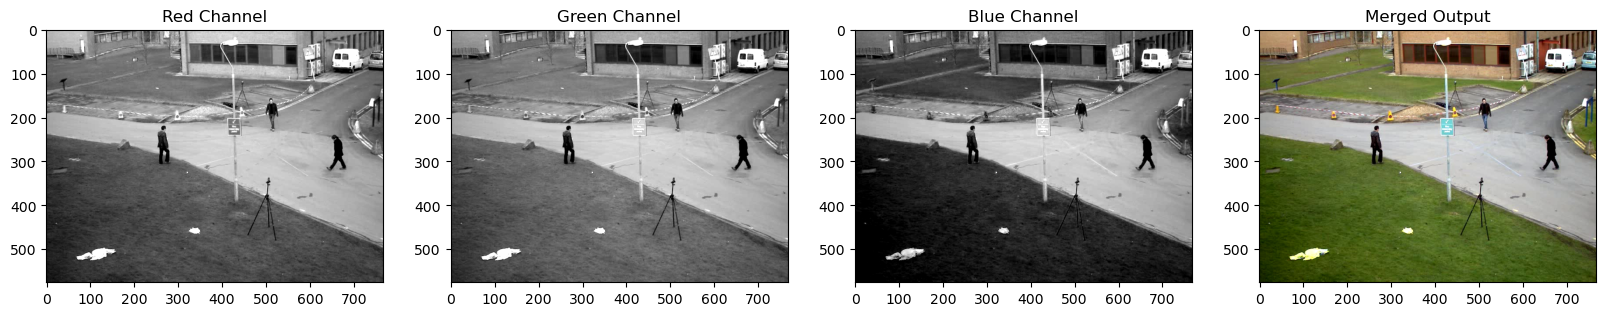

In [31]:
# Split the image into the B,G,R components
b, g, r = cv.split(img)

# Show the channels
plt.figure(figsize=[20, 5])

plt.subplot(141);plt.imshow(r, cmap="gray");plt.title("Red Channel")
plt.subplot(142);plt.imshow(g, cmap="gray");plt.title("Green Channel")
plt.subplot(143);plt.imshow(b, cmap="gray");plt.title("Blue Channel")

# Merge the individual channels into a BGR image
imgMerged = cv.merge((b, g, r))
# Show the merged output
plt.subplot(144)
plt.imshow(imgMerged[:, :, ::-1])
plt.title("Merged Output")

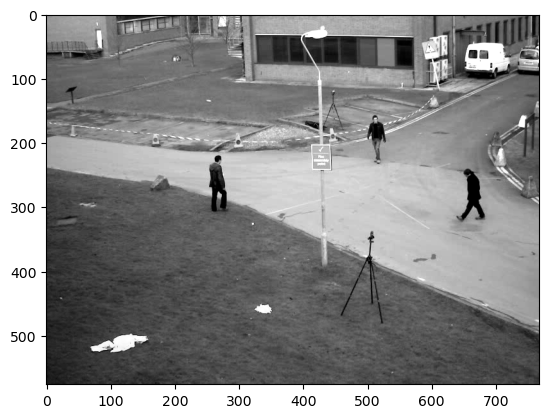

In [36]:
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap="gray")

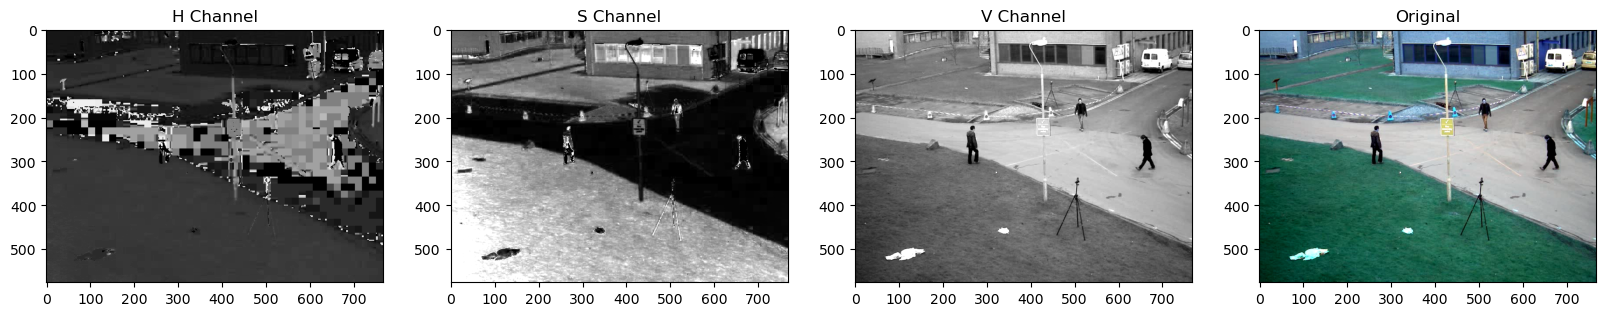

In [38]:
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Split the image into the H,S,V components
h,s,v = cv.split(img_hsv)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h, cmap="gray");plt.title("H Channel");
plt.subplot(142);plt.imshow(s, cmap="gray");plt.title("S Channel");
plt.subplot(143);plt.imshow(v, cmap="gray");plt.title("V Channel");
plt.subplot(144);plt.imshow(img);   plt.title("Original");

Modify a channel

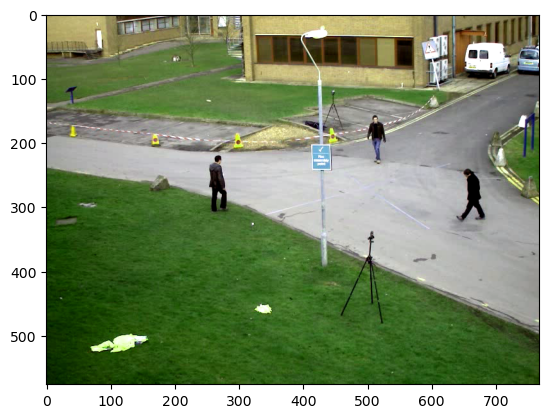

In [39]:
h_up = 10 + h
img_up = cv.cvtColor(
    cv.merge((h_up, s, v)),
    cv.COLOR_HSV2RGB
)
plt.imshow(img_up)

In [43]:
filename = os.path.join(os.getcwd(),"samples/Background_Subtraction_Tutorial_frame_gray.png")
cv.imwrite(filename, gray_img)

True